In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

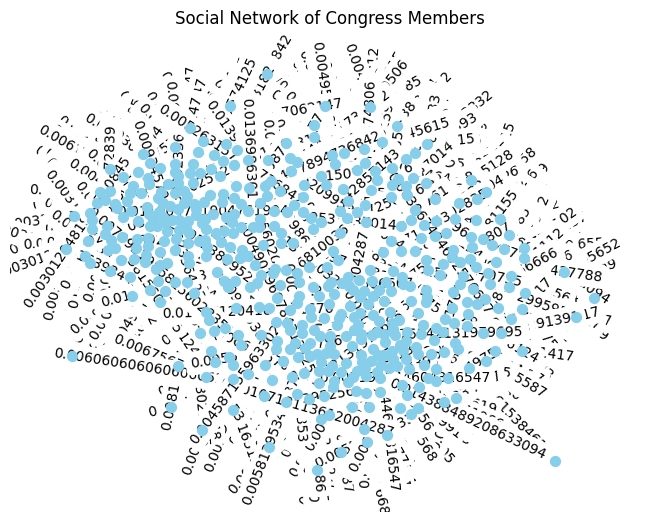

In [3]:
edge_list_file = './us_congress.edgelist'

G = nx.read_edgelist(edge_list_file)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='skyblue')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Social Network of Congress Members')
plt.show()

In [4]:
edge_list = []

with open(edge_list_file) as f:
    for line in f:
        components = line.strip().split()
        source_node = int(components[0])
        target_node = int(components[1])
        edge = (source_node, target_node)
        edge_list.append(edge)

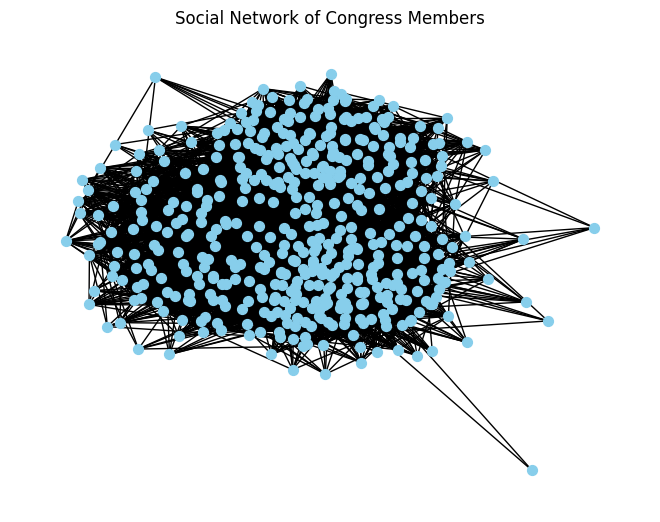

In [14]:
G = nx.Graph()
G.add_edges_from(edge_list)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='skyblue')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Social Network of Congress Members')
plt.show()

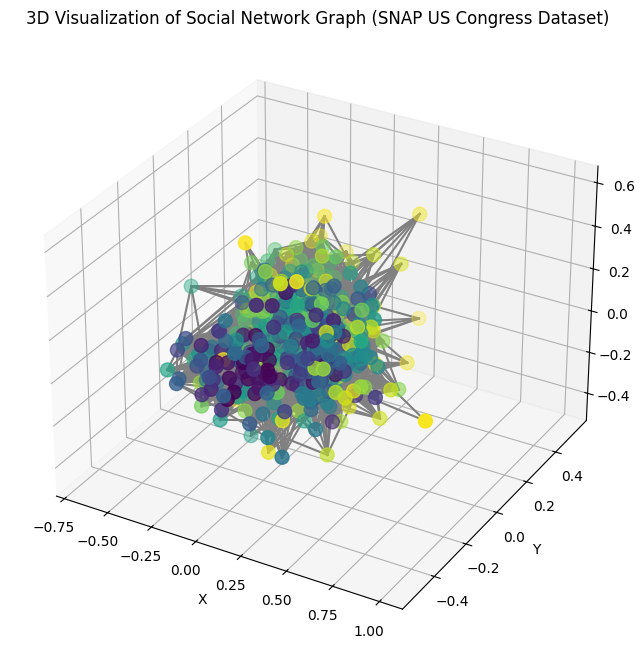

In [6]:
G = nx.Graph()

G.add_edges_from(edge_list)

pos = nx.spring_layout(G, dim=3)

nodes = G.nodes()
node_colors = range(len(nodes))
x = [pos[node][0] for node in nodes]
y = [pos[node][1] for node in nodes]
z = [pos[node][2] for node in nodes]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=node_colors, cmap='viridis', s=100)

for u, v in G.edges():
    ax.plot([pos[u][0], pos[v][0]], [pos[u][1], pos[v][1]], [pos[u][2], pos[v][2]], color='gray')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('3D Visualization of Social Network Graph (SNAP US Congress Dataset)')

plt.show()

In [7]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print('Number of connected components:', nx.number_connected_components(G))
print('Nodes', G.nodes())
node_as_integers = [int(node) for node in G.nodes()]
sorted_nodes = sorted(node_as_integers)

print('Sorted Nodes',sorted_nodes)

Number of nodes: 475
Number of edges: 10222
Number of connected components: 1
Nodes [0, 4, 12, 18, 25, 30, 46, 55, 58, 59, 74, 76, 77, 85, 86, 87, 154, 168, 341, 374, 401, 3, 14, 17, 24, 27, 64, 79, 84, 88, 89, 149, 179, 197, 213, 224, 243, 250, 268, 286, 293, 315, 447, 460, 11, 13, 32, 57, 91, 126, 162, 254, 255, 327, 334, 392, 398, 448, 454, 470, 2, 9, 28, 42, 50, 54, 68, 110, 217, 229, 299, 442, 48, 53, 61, 71, 75, 80, 111, 123, 136, 147, 193, 205, 215, 247, 278, 387, 393, 403, 450, 452, 21, 47, 70, 72, 138, 160, 161, 190, 234, 246, 260, 306, 335, 389, 415, 422, 428, 20, 26, 36, 38, 130, 139, 201, 207, 251, 325, 349, 358, 367, 371, 423, 5, 90, 92, 119, 122, 135, 155, 165, 177, 256, 424, 465, 467, 6, 15, 35, 60, 81, 82, 148, 183, 375, 381, 411, 416, 437, 439, 8, 10, 37, 180, 262, 263, 281, 292, 351, 368, 376, 405, 433, 33, 65, 287, 329, 364, 23, 66, 117, 137, 266, 336, 400, 444, 466, 7, 51, 63, 188, 280, 296, 431, 443, 43, 73, 214, 311, 326, 408, 421, 121, 143, 169, 259, 410, 96, 105

In [8]:
def find_shortest_path(graph, source, target):
    try:
        path = nx.shortest_path(graph, source=source, target=target, weight='weight')
        distance = nx.shortest_path_length(graph, source=source, target=target, weight='weight')
        return path, distance
    except nx.NetworkXNoPath:
        return "No path found", float('inf')

source_node = int(input('Enter the source node: '))
target_node = int(input('Enter the target node: '))

shortest_path, distance = find_shortest_path(G, source_node, target_node)


print("Shortest path:", shortest_path)



Shortest path: [4, 17, 78]


In [9]:
def find_shortest_path(graph, source, target):
    try:
        path = nx.shortest_path(graph, source=source, target=target, weight='weight')
        distance = nx.shortest_path_length(graph, source=source, target=target, weight='weight')
        return path, distance
    except nx.NetworkXNoPath:
        return "No path found", float('inf')


source_node = 0
largest_shortest_path = []

for i in range(1, 475):
    target_node = i
    shortest_path, distance = find_shortest_path(G, source_node, target_node)
    print(f"Shortest path from {source_node} to {target_node}: {shortest_path}")

    if len(shortest_path) > len(largest_shortest_path):
        largest_shortest_path = shortest_path

    print()

print('**************************')
print(f"Shortest path of maximum edges: {largest_shortest_path}")

Shortest path from 0 to 1: [0, 11, 1]

Shortest path from 0 to 2: [0, 18, 2]

Shortest path from 0 to 3: [0, 4, 3]

Shortest path from 0 to 4: [0, 4]

Shortest path from 0 to 5: [0, 55, 5]

Shortest path from 0 to 6: [0, 58, 6]

Shortest path from 0 to 7: [0, 77, 7]

Shortest path from 0 to 8: [0, 59, 8]

Shortest path from 0 to 9: [0, 9]

Shortest path from 0 to 10: [0, 59, 10]

Shortest path from 0 to 11: [0, 11]

Shortest path from 0 to 12: [0, 12]

Shortest path from 0 to 13: [0, 13]

Shortest path from 0 to 14: [0, 4, 14]

Shortest path from 0 to 15: [0, 58, 15]

Shortest path from 0 to 16: [0, 50, 16]

Shortest path from 0 to 17: [0, 4, 17]

Shortest path from 0 to 18: [0, 18]

Shortest path from 0 to 19: [0, 30, 19]

Shortest path from 0 to 20: [0, 46, 20]

Shortest path from 0 to 21: [0, 30, 21]

Shortest path from 0 to 22: [0, 38, 22]

Shortest path from 0 to 23: [0, 76, 23]

Shortest path from 0 to 24: [0, 4, 24]

Shortest path from 0 to 25: [0, 25]

Shortest path from 0 to 2

In [10]:
import networkx as nx

degree_centrality = nx.degree_centrality(G)

betweenness_centrality = nx.betweenness_centrality(G)

eigenvector_centrality = nx.eigenvector_centrality(G)

print("Degree Centrality:")
count = 0
for node, centrality in degree_centrality.items():
    if count == 5:
        count = 0
        break
    count += 1
    print(f"Node {node}: {centrality}")

print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    if count == 5:
        count = 0
        break
    count += 1
    print(f"Node {node}: {centrality}")

print("\nEigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    if count == 5:
        count = 0
        break
    count += 1
    print(f"Node {node}: {centrality}")


Degree Centrality:
Node 0: 0.06962025316455696
Node 4: 0.0970464135021097
Node 12: 0.09071729957805906
Node 18: 0.06751054852320675
Node 25: 0.12447257383966244

Betweenness Centrality:
Node 0: 0.0007326852052049204
Node 4: 0.0013101819059968727
Node 12: 0.0022686790838825537
Node 18: 0.000796431869573516
Node 25: 0.002849695092246719

Eigenvector Centrality:
Node 0: 0.022040967021626317
Node 4: 0.034097551228184274
Node 12: 0.028085491805914374
Node 18: 0.017549633748819623
Node 25: 0.04568778915239323


In [11]:
import community as community_louvain

def detect_communities(graph):
  undirected_graph = graph.to_undirected()
  partition = community_louvain.best_partition(undirected_graph)

  community_nodes = {community_id: [] for community_id in set(partition.values())}
  for node, community_id in partition.items():
    community_nodes[community_id].append(node)

  return community_nodes

community_nodes = detect_communities(G)

print("Nodes in each community:")
for community_id, nodes in community_nodes.items():
  print(f"Community {community_id}: {nodes}")


Nodes in each community:
Community 0: [0, 4, 12, 18, 25, 30, 46, 55, 58, 59, 74, 76, 77, 85, 86, 87, 3, 14, 17, 24, 27, 64, 79, 84, 88, 89, 11, 13, 32, 57, 91, 448, 2, 9, 28, 42, 50, 54, 68, 48, 53, 61, 71, 75, 80, 21, 47, 72, 415, 20, 26, 36, 38, 5, 90, 6, 15, 35, 60, 81, 82, 8, 10, 37, 33, 65, 364, 23, 66, 444, 7, 51, 63, 280, 43, 73, 463, 56, 1, 39, 52, 459, 40, 22, 16, 45, 83, 230, 78, 29, 41, 44, 282, 67, 62, 69, 19, 49, 31]
Community 1: [284, 181]
Community 2: [154, 168, 341, 374, 401, 149, 179, 197, 213, 224, 243, 250, 268, 286, 293, 315, 447, 460, 126, 162, 254, 327, 334, 392, 398, 454, 110, 217, 229, 299, 442, 111, 123, 136, 147, 193, 205, 215, 247, 278, 387, 393, 403, 450, 70, 138, 160, 139, 207, 325, 349, 358, 367, 371, 423, 92, 119, 122, 135, 155, 165, 177, 256, 424, 465, 467, 148, 183, 375, 381, 411, 416, 439, 180, 262, 263, 281, 292, 368, 376, 405, 433, 287, 117, 400, 466, 296, 431, 443, 311, 326, 408, 421, 121, 169, 259, 410, 96, 156, 157, 171, 222, 270, 279, 303, 365, 4

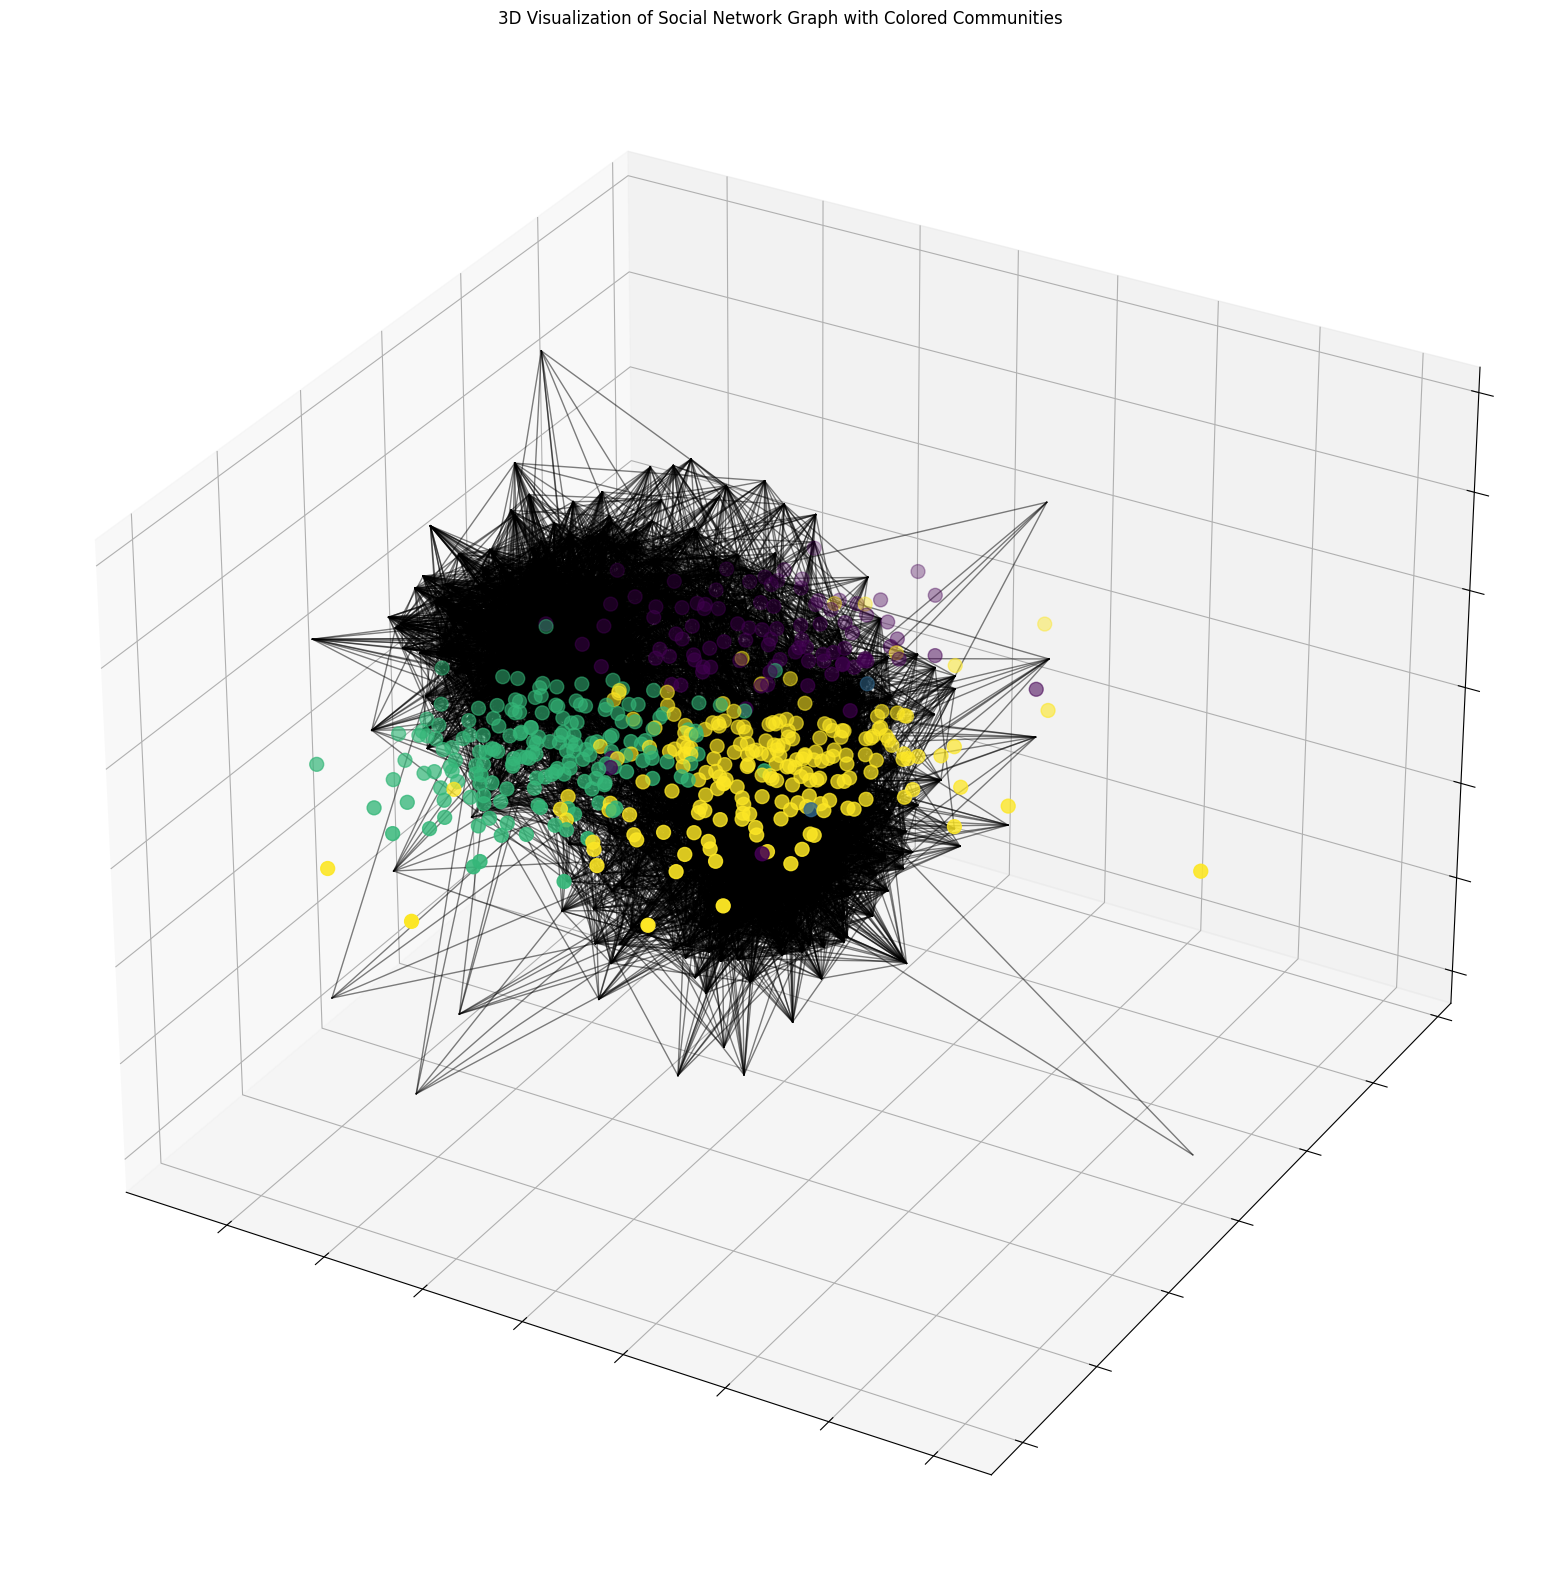

In [12]:
def detect_communities(graph):
    undirected_graph = graph.to_undirected()
    partition = community_louvain.best_partition(undirected_graph)
    community_nodes = {community_id: [] for community_id in set(partition.values())}
    for node, community_id in partition.items():
        community_nodes[community_id].append(node)
    return partition, community_nodes

def plot_3d_graph_with_communities(graph, pos, partition, community_nodes):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')

    node_colors = [partition[node] for node in graph.nodes()]

    nx.draw_networkx_nodes(graph, pos, ax=ax, node_color=node_colors, node_size=100)

    for edge in graph.edges():
        u, v = edge
        x = [pos[u][0], pos[v][0]]
        y = [pos[u][1], pos[v][1]]
        z = [pos[u][2], pos[v][2]]
        ax.plot(x, y, z, color='black', linewidth=1, alpha=0.5)


    plt.title('3D Visualization of Social Network Graph with Colored Communities')

    plt.show()


partition, community_nodes = detect_communities(G)

pos = nx.spring_layout(G, dim=3)

plot_3d_graph_with_communities(G, pos, partition, community_nodes)
